In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from matplotlib.animation import FuncAnimation
from sympy import fourier_series

In [ ]:
# @title Funções exemplos

onda_quadrada01 = lambda x: np.piecewise(x,
 [
  (-2*np.pi <= x) & (x < -np.pi),
  (-np.pi <= x) & (x < 0),
  (0 <= x) & (x <= np.pi),
  (np.pi < x) & (x <= 2*np.pi)
  ],
 [1, -1, 1, -1])

escada = lambda x: np.piecewise(x,
      [(x < -10),
      (x >= -10) & (x < -5),
      (x >= -5) & (x < 0),
      (x >= 0) & (x < 5),
      (x >= 5) & (x <= 10),
      x > 10],
    [0, -5, -2.5, 2.5, 5, 10])

onda_quadrada02 = lambda x: np.piecewise(x,
                        [x < -10,
                         (x >= -10) & (x < -5),
                         (x >= -5) & (x < 0),
                         (x >= 0) & (x < 5),
                         (x >= 5) & (x < 10),
                         x >= 10],
                        [-1, 1, -1, 1, -1, 1])

torre = lambda x: np.piecewise(x,
                        [(x < -8),
                         (x >= -8) & (x < -7),
                         (x >= -7) & (x < -6),
                         (x >= -6) & (x < -5),
                         (x >= -5) & (x < -4),
                         (x >= -4) & (x < -3),
                         (x >= -3) & (x < -2),
                         (x >= -2) & (x < -1),
                         (x >= -1) & (x < 0),
                         (x >= 0) & (x < 1),
                         (x >= 1) & (x < 2),
                         (x >= 2) & (x < 3),
                         (x >= 3) & (x < 4),
                         (x >= 4) & (x < 5),
                         (x >= 5) & (x < 6),
                         (x >= 6) & (x < 7),
                         (x >= 7) & (x < 8),
                         (x >= 8)],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [ ]:
# @title Classe Fourier
class SFourier:
  def __init__(self, f):
    self.f = f

### Método 1
  def Fourier(self, L, Nsom):
    """
      Função que cálcula a soma parcial da série de Fourier até N, no domínio [-L,L].
      L: intervalo de integração;
      Nsom: número de somas parciais;

      **Retorna as coordenadas X e Y da série e a matriz de passos YY.**
    """

    # Vetor dominio no intervalo [-L, L].
    X = np.linspace(-L, L, 10000)

    # Matriz de passos ! ! !
    YY = np.zeros((Nsom + 1, 10000))

    # Termo inicial da série de Fourier.
    a0 = (1/L)*np.trapz(self.f(X), X)

    # Termo inicial da matriz de passos.
    YY[0,] = (a0/2)*np.ones(10000)

    # For que representa a soma do n-ésimo termo da série.
    for n in range(1, Nsom+1):
      # Funções trigonométricas.
      cos_n = lambda x: np.cos(n*np.pi*x/L)
      sen_n = lambda x: np.sin(n*np.pi*x/L)
      fcos_n = lambda x: self.f(x)*cos_n(x)
      fsen_n = lambda x: self.f(x)*sen_n(x)

      # Coeficientes de Fourier.
      # Integração de -L a L.
      an = (1/L)*np.trapz(fcos_n(X), X)
      bn = (1/L)*np.trapz(fsen_n(X), X)

      # Vetor imagem que recebe o termo do somatório.
      YY[n,] = an*cos_n(X) + bn*sen_n(X)


    # Vetor imagem da série de Fourier.
    Y = YY.sum(axis = 0)

    # Retorna as coordenadas X e Y da série.
    return X, Y, YY

### Método 2
  def plot_Fourier(self, L, Nsom, plotf = True):
    """
      Função que plota a série de Fourier.
      L: intervalo de integração [-L, L];
      Nsom: número de somas parciais;
      plotf: se True, plota o gráfico da função original;
    """

    # Configurações do gráfico
    plt.figure(figsize=(10, 7))
    plt.title(f"Série de Fourier (Nsom = {Nsom})")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-L, L)
    plt.grid()

    # Cálculo da soma parcial da série de Fourier para o domínio [-L, L].
    X, Y, _ = self.Fourier(L, Nsom)

    # Plot da série
    plt.plot(X, Y, color = 'black')

    # Se True, plota o gráfico da função original.
    if plotf:
      plt.plot(X, self.f(X), color = 'orange')
      plt.legend(["F(x)", "f(x)"], loc = 'upper right', title = "Funções")

    plt.show()

    return

### Método 3
  def animation_Fourier(self, L, Nsom, plotf = True, name = 'S_Fourier', fps = 30, save = True, typeSave = 'gif'):
    """
      Função que anima a série de Fourier a cada passo da soma parcial.
      L: intervalo de integração [-L, L];
      Nsom: número de somas parciais;
      plotf: se True, plota o gráfico da função original;
      name: Nome do arquivo;
      fps: Frames por segundo;
      save: Se True, salva a animação;
      typeSave: Tipo de arquivo da animação, 'mp4' ou 'gif'.
    """

    # Define as configurações do gráfico e da animação.

    fig = plt.figure(figsize=(10, 7))
    line, = plt.plot([], [], lw=2, color = 'black')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()

    X, _, YY = self.Fourier(L, Nsom)

    plt.xlim(-L, L)
    plt.ylim(min(self.f(X)) - .5, max(self.f(X)) + .5)

    # Se True, plota o gráfico da função o original.
    if plotf:
      plt.plot(X, self.f(X), color = 'orange')
      # Exibindo legendas
      plt.legend(["F(x)", "f(x)"], loc = 'upper right', title = 'Funções')

    # Função que realiza o update na animação.
    def update(i):
      X, Y, _ = self.Fourier(L, i)
      line.set_data(X, YY[0:i].sum(axis = 0))
      plt.title(f'Série de Fourier (Nsom = {i})')
      return line,

    # Animação
    anim = FuncAnimation(fig, update, range(1, Nsom+1), blit=True)

    # Salva a animação caso queira salvar.
    if save:
      nome_arquivo = './' + str(name) + '.' + str(typeSave)
      if typeSave == 'mp4':
        anim.save(nome_arquivo, writer="ffmpeg", fps = fps)
      elif typeSave == 'gif':
        anim.save(nome_arquivo, writer="pillow", fps = fps)

    plt.show()
    plt.close()

    return

# Testes

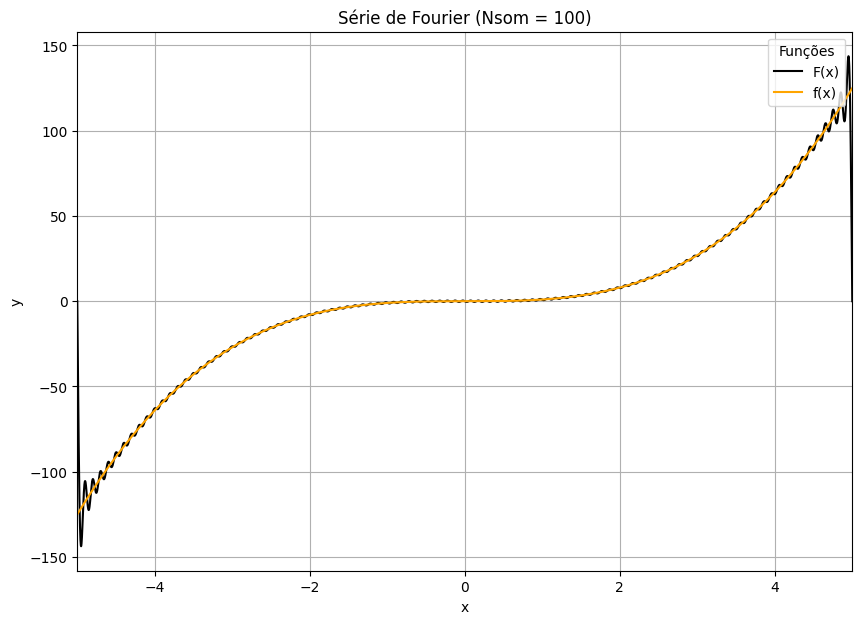

In [ ]:
F1 = SFourier(lambda x: x**3)
F1.plot_Fourier(5, 100)

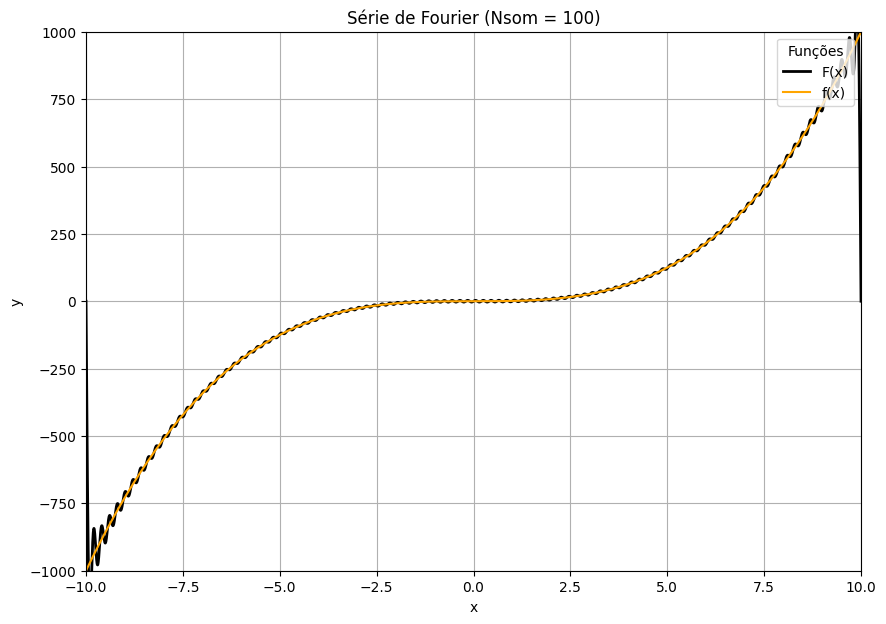

In [ ]:
F1.animation_Fourier(10, 100, fps = 15)

In [ ]:
X, Y, YY = F1.Fourier(10, 1)

YY

array([[ 7.20072007,  7.20072007,  7.20072007, ...,  7.20072007,
         7.20072007,  7.20072007],
       [-3.82259528, -3.82259452, -3.82259226, ..., -3.82259226,
        -3.82259452, -3.82259528]])